In [1]:
import torch
import numpy as np
from torch import nn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Mse with numpy and pytorch 

Numpy:

In [2]:
X = np.array([1,2,3,4] , dtype=np.float32)
Y = np.array([2,3.8,6,8.2] , dtype=np.float32)
W = 0

In [3]:
def forward(a):
    return (a*W)

In [4]:
def Loss(y , yprd):
    return ((y - yprd)**2).mean()

Loss func is : 1/N (y-xw)^2 --> d f / d w = 1/N * 2x (y-xw(Yprd))

In [5]:
#d f / d w:
def Grad(y , yprd , x):
    return ((2*x) @ (yprd - y)).mean()

In [6]:
print(f'Prediction of f(5) before processing = {forward(10):.2f}')

Prediction of f(5) before processing = 0.00


In [7]:
alpha=0.01;num=20
for i in range(num):

    yprd = forward(X)
    grd = Grad(Y , yprd , X)
    W -= (alpha * grd)
    if(i):
        print(i+1,'. ','W = ',W,' , ', f'loss = {Loss(Y , yprd):.10f}')

2 .  W =  1.691199951171875  ,  loss = 4.8828802109
3 .  W =  1.88447998046875  ,  loss = 0.7969411016
4 .  W =  1.9617919635772705  ,  loss = 0.1431904584
5 .  W =  1.9927167510986328  ,  loss = 0.0385904610
6 .  W =  2.005086660385132  ,  loss = 0.0218544640
7 .  W =  2.0100346612930298  ,  loss = 0.0191767104
8 .  W =  2.0120139074325563  ,  loss = 0.0187482703
9 .  W =  2.012805542945862  ,  loss = 0.0186797138
10 .  W =  2.013122248649597  ,  loss = 0.0186687484
11 .  W =  2.0132488536834714  ,  loss = 0.0186669864
12 .  W =  2.0132994842529293  ,  loss = 0.0186667126
13 .  W =  2.0133197879791256  ,  loss = 0.0186666660
14 .  W =  2.0133279466629026  ,  loss = 0.0186666548
15 .  W =  2.013331212997436  ,  loss = 0.0186666623
16 .  W =  2.013332505226135  ,  loss = 0.0186666548
17 .  W =  2.013332910537719  ,  loss = 0.0186666623
18 .  W =  2.013333187103271  ,  loss = 0.0186666586
19 .  W =  2.0133333349227898  ,  loss = 0.0186666530
20 .  W =  2.013333325386047  ,  loss = 0.0186

In [8]:
print(f'Prediction of f(5) After processing = {forward(10):.2f}')       

Prediction of f(5) After processing = 20.13


# Pytorch version 1

In [9]:
X = torch.tensor([1,2,3,4] , dtype=torch.float32)
Y = torch.tensor([2,3.8,6,8.2] , dtype=torch.float32)
W = torch.tensor(0.0 , dtype=torch.float32 , requires_grad=True)
X.dtype

torch.float32

In [10]:
def Forward(a):
    return a * W

In [11]:
def loss(y , yprd):
    return ((y - yprd)**2).mean()

In [12]:
print(f'Prediction of f(5) before processing = {Forward(10):.2f}')

Prediction of f(5) before processing = 0.00


In [13]:
alpha = 0.01 ; num = 101

for i in range(num):
    
    yprd = Forward(X)
    ls = loss(Y , yprd)

    ls.backward()

    with torch.no_grad():
        W -= (alpha * W.grad)

    W.grad.zero_()

    if(not i%5):
        print(i + 1, '. ', 'W = ', f'{W:.3f}', ' , ', f'loss = {loss(Y, yprd):.10f}')

1 .  W =  0.302  ,  loss = 30.4199981689
6 .  W =  1.254  ,  loss = 6.0039119720
11 .  W =  1.676  ,  loss = 1.1970084906
16 .  W =  1.864  ,  loss = 0.2506518364
21 .  W =  1.947  ,  loss = 0.0643384159
26 .  W =  1.984  ,  loss = 0.0276582260
31 .  W =  2.000  ,  loss = 0.0204368681
36 .  W =  2.008  ,  loss = 0.0190151557
41 .  W =  2.011  ,  loss = 0.0187352542
46 .  W =  2.012  ,  loss = 0.0186801609
51 .  W =  2.013  ,  loss = 0.0186693110
56 .  W =  2.013  ,  loss = 0.0186671820
61 .  W =  2.013  ,  loss = 0.0186667629
66 .  W =  2.013  ,  loss = 0.0186666772
71 .  W =  2.013  ,  loss = 0.0186666623
76 .  W =  2.013  ,  loss = 0.0186666641
81 .  W =  2.013  ,  loss = 0.0186666623
86 .  W =  2.013  ,  loss = 0.0186666548
91 .  W =  2.013  ,  loss = 0.0186666586
96 .  W =  2.013  ,  loss = 0.0186666623
101 .  W =  2.013  ,  loss = 0.0186666623


In [14]:
print(f'Prediction of f(5) After processing = {Forward(10):.2f}')   

Prediction of f(5) After processing = 20.13


## version 2

In [15]:
X = torch.tensor([1,2,3,4] , dtype=torch.float32)
Y = torch.tensor([2,3.8,6,8.2] , dtype=torch.float32)
W = torch.tensor(0.0 , dtype=torch.float32 , requires_grad=True)
X.dtype

torch.float32

In [16]:
def forwardn(a):
    return a*W

In [17]:
alpha = 0.01
lossn = nn.MSELoss()
optim = torch.optim.SGD([W] , lr=0.01)

In [18]:
print(f'Prediction of f(5) before processing = {forwardn(10):.2f}')

Prediction of f(5) before processing = 0.00


In [19]:
num = 100

for i in range(num):

    yprd = forwardn(X)
    ls = lossn(Y , yprd)
    ls.backward()

    optim.step()
    optim.zero_grad()
    
    if(not i%5):
        print(i + 1, '. ', 'W = ', f'{W:.3f}', ' , ', f'loss = {lossn(Y, yprd):.10f}')

1 .  W =  0.302  ,  loss = 30.4199981689
6 .  W =  1.254  ,  loss = 6.0039119720
11 .  W =  1.676  ,  loss = 1.1970084906
16 .  W =  1.864  ,  loss = 0.2506518364
21 .  W =  1.947  ,  loss = 0.0643384159
26 .  W =  1.984  ,  loss = 0.0276582260
31 .  W =  2.000  ,  loss = 0.0204368681
36 .  W =  2.008  ,  loss = 0.0190151557
41 .  W =  2.011  ,  loss = 0.0187352542
46 .  W =  2.012  ,  loss = 0.0186801609
51 .  W =  2.013  ,  loss = 0.0186693110
56 .  W =  2.013  ,  loss = 0.0186671820
61 .  W =  2.013  ,  loss = 0.0186667629
66 .  W =  2.013  ,  loss = 0.0186666772
71 .  W =  2.013  ,  loss = 0.0186666623
76 .  W =  2.013  ,  loss = 0.0186666641
81 .  W =  2.013  ,  loss = 0.0186666623
86 .  W =  2.013  ,  loss = 0.0186666548
91 .  W =  2.013  ,  loss = 0.0186666586
96 .  W =  2.013  ,  loss = 0.0186666623


In [20]:
print(f'Prediction of f(5) After processing = {forwardn(10):.2f}')   

Prediction of f(5) After processing = 20.13


## version 3

In [21]:
X = torch.tensor([[1],[2],[3],[4]] , dtype=torch.float32)
Y = torch.tensor([[2],[3.8],[6],[8.2]] , dtype=torch.float32)

In [22]:
X_test = torch.tensor([10], dtype=torch.float32)

In [23]:
_ , NumFeatures = X.shape

In [24]:
alpha = 0.01
lossn2 = nn.MSELoss()
Model  = nn.Linear(in_features=NumFeatures , out_features=NumFeatures)
optim  = torch.optim.SGD(Model.parameters() , alpha) 

In [25]:
print(f'Prediction of f(5) before processing = {Model(X_test).item():.2f}')

Prediction of f(5) before processing = 0.24


In [26]:
num = 300

for i in range(num):

    yprd = Model(X)

    ls = lossn2(Y , yprd)
    ls.backward()

    optim.step()
    optim.zero_grad()

    if(not i%15):
        [w , _] = Model.parameters()

        print(i + 1, '. ', 'W = ', f'{w[0][0].item():.3f}', ' , ', f'loss = {lossn2(Y, yprd):.10f}')

1 .  W =  0.376  ,  loss = 32.5171127319
16 .  W =  1.837  ,  loss = 0.1766270995
31 .  W =  1.937  ,  loss = 0.0395155624
46 .  W =  1.949  ,  loss = 0.0366368964
61 .  W =  1.955  ,  loss = 0.0345153771
76 .  W =  1.961  ,  loss = 0.0325784534
91 .  W =  1.966  ,  loss = 0.0308081917
106 .  W =  1.971  ,  loss = 0.0291902348
121 .  W =  1.976  ,  loss = 0.0277114362
136 .  W =  1.981  ,  loss = 0.0263598971
151 .  W =  1.985  ,  loss = 0.0251246113
166 .  W =  1.989  ,  loss = 0.0239954665
181 .  W =  1.993  ,  loss = 0.0229635611
196 .  W =  1.997  ,  loss = 0.0220204648
211 .  W =  2.001  ,  loss = 0.0211584494
226 .  W =  2.004  ,  loss = 0.0203705914
241 .  W =  2.007  ,  loss = 0.0196505282
256 .  W =  2.011  ,  loss = 0.0189923979
271 .  W =  2.014  ,  loss = 0.0183908790
286 .  W =  2.017  ,  loss = 0.0178410430


In [27]:
print(f'Prediction of f(5) After processing = {Model(X_test).item():.2f}')

Prediction of f(5) After processing = 20.17


## Using Dataset for linear regression

In [28]:
x_np , y_np = datasets.make_regression(n_samples=100, n_features=1 , noise=5)

In [29]:
X = torch.from_numpy(x_np.astype(np.float32))
Y = torch.from_numpy(y_np.astype(np.float32))

In [30]:
Y = Y.view(Y.shape[0] , 1)
Y[:20 ,]

tensor([[ -7.1255],
        [ -0.0947],
        [ 13.0565],
        [ 16.5497],
        [  0.1158],
        [-24.4478],
        [ 15.3080],
        [ -1.4040],
        [-21.5126],
        [-35.9431],
        [ -1.0182],
        [  7.6681],
        [  8.5963],
        [ 21.2318],
        [ 14.7671],
        [-31.8011],
        [ -1.6111],
        [-10.3101],
        [ 28.8077],
        [ 22.1924]])

In [31]:
Y.shape , X.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [32]:
_ , NumFeatures = X.shape
NumFeatures

1

In [33]:
Alpha = 0.01
nLoos = nn.MSELoss()
model = nn.Linear(in_features=NumFeatures , out_features=1)
optim = torch.optim.SGD(model.parameters() , Alpha)

In [34]:
num = 120

for epoch in range(num):
    yprd = model(X)
    
    ls = nLoos(Y , yprd)
    ls.backward()
    optim.step()
    optim.zero_grad()

    if not epoch % 5:
        print(epoch,'. ' , "loss = " , f'loss = {nLoos(Y, yprd):.10f}')

0 .  loss =  loss = 643.9822998047
5 .  loss =  loss = 541.1375122070
10 .  loss =  loss = 455.3702087402
15 .  loss =  loss = 383.8334045410
20 .  loss =  loss = 324.1568908691
25 .  loss =  loss = 274.3668823242
30 .  loss =  loss = 232.8194122314
35 .  loss =  loss = 198.1449279785
40 .  loss =  loss = 169.2024383545
45 .  loss =  loss = 145.0409851074
50 .  loss =  loss = 124.8680725098
55 .  loss =  loss = 108.0230484009
60 .  loss =  loss = 93.9551391602
65 .  loss =  loss = 82.2049026489
70 .  loss =  loss = 72.3893432617
75 .  loss =  loss = 64.1889190674
80 .  loss =  loss = 57.3370552063
85 .  loss =  loss = 51.6112899780
90 .  loss =  loss = 46.8260040283
95 .  loss =  loss = 42.8262557983
100 .  loss =  loss = 39.4827766418
105 .  loss =  loss = 36.6875648499
110 .  loss =  loss = 34.3504600525
115 .  loss =  loss = 32.3962135315


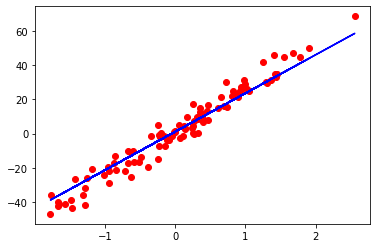

In [35]:
predicted = model(X).detach().numpy()

plt.plot(x_np, y_np, 'ro')
plt.plot(x_np, predicted, 'b')
plt.show()

# Multiple Linear Regression

In [36]:
x_np, y_np = datasets.make_regression(n_samples=100, n_features=3, noise=5)
X = torch.from_numpy(x_np.astype(np.float32))
Y = torch.from_numpy(y_np.astype(np.float32))

In [37]:
Y = Y.view(100 , 1)  
X = X.view(100 , 3)

In [38]:
Alpha = 0.01
nLoss = nn.MSELoss()
model = nn.Linear(in_features=3, out_features=1)
optimizer = torch.optim.SGD(model.parameters(), lr=Alpha)

In [39]:
num = 250
for epoch in range(num):
    y_pred = model(X)
    
    loss = nLoss(y_pred, Y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: loss = {loss.item():.15f}")

Epoch 0: loss = 2941.582763671875000
Epoch 10: loss = 1850.054321289062500
Epoch 20: loss = 1183.081054687500000
Epoch 30: loss = 770.405456542968750
Epoch 40: loss = 511.623870849609375
Epoch 50: loss = 347.052642822265625
Epoch 60: loss = 240.885757446289062
Epoch 70: loss = 171.415969848632812
Epoch 80: loss = 125.329879760742188
Epoch 90: loss = 94.357887268066406
Epoch 100: loss = 73.293655395507812
Epoch 110: loss = 58.813026428222656
Epoch 120: loss = 48.763355255126953
Epoch 130: loss = 41.731056213378906
Epoch 140: loss = 36.775218963623047
Epoch 150: loss = 33.261787414550781
Epoch 160: loss = 30.758319854736328
Epoch 170: loss = 28.967025756835938
Epoch 180: loss = 27.680828094482422
Epoch 190: loss = 26.754629135131836
Epoch 200: loss = 26.086069107055664
Epoch 210: loss = 25.602544784545898
Epoch 220: loss = 25.252248764038086
Epoch 230: loss = 24.998146057128906
Epoch 240: loss = 24.813625335693359


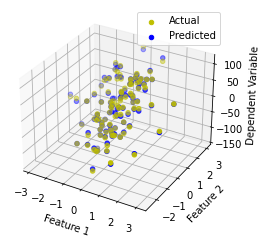

In [40]:
x1 = x_np[:, 0]
x2 = x_np[:, 1]
x3 = x_np[:, 2]
x_pred = np.column_stack((x1, x2, x3))
y_pred = model(torch.from_numpy(x_pred.astype(np.float32))).detach().numpy()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y_np, color='y', label='Actual')
ax.scatter(x1, x2, y_pred, color='blue', label='Predicted')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Dependent Variable')

plt.legend()
plt.show()

# Logistic Regression by pytorch

In [41]:
df = datasets.load_breast_cancer()
X , Y = df.data , df.target

In [42]:
NumData , NumFeatures = X.shape
NumData , NumFeatures

(569, 30)

In [43]:
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.2 , random_state=1000)

In [44]:
scl = StandardScaler()

x_train = scl.fit_transform(x_train)
x_test  = scl.transform(x_test) 

In [45]:
x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))
y_train.shape

torch.Size([455])

In [46]:
y_train = y_train.view(y_train.shape[0] , 1)
y_test = y_test.view(y_test.shape[0] , 1)

In [47]:
alpha = 0.01
loss  = nn.BCELoss()
model = nn.Linear(in_features=NumFeatures , out_features=1)
optim = torch.optim.SGD(model.parameters() , lr=alpha)

In [48]:
def forward(x):
    return torch.sigmoid(x)

In [49]:
num = 1200

for epoch in range(num):

    yprd = forward(model(x_train))
    ls = loss(yprd , y_train)
    ls.backward()

    optim.step()
    optim.zero_grad()

    if not epoch % 50:
        print(epoch ,'. ' , "Loss = " , ls.item())

0 .  Loss =  0.7775930166244507
50 .  Loss =  0.3647938370704651
100 .  Loss =  0.2705819606781006
150 .  Loss =  0.2248850166797638
200 .  Loss =  0.19692449271678925
250 .  Loss =  0.17775791883468628
300 .  Loss =  0.16369828581809998
350 .  Loss =  0.15290217101573944
400 .  Loss =  0.1443280577659607
450 .  Loss =  0.13733728229999542
500 .  Loss =  0.1315152794122696
550 .  Loss =  0.12658114731311798
600 .  Loss =  0.12233784794807434
650 .  Loss =  0.11864310503005981
700 .  Loss =  0.11539168655872345
750 .  Loss =  0.1125040054321289
800 .  Loss =  0.10991876572370529
850 .  Loss =  0.10758792608976364
900 .  Loss =  0.10547325760126114
950 .  Loss =  0.10354407131671906
1000 .  Loss =  0.10177523642778397
1050 .  Loss =  0.10014611482620239
1100 .  Loss =  0.09863957017660141
1150 .  Loss =  0.09724116325378418


In [50]:
with torch.no_grad():
    y_pred = forward(model(x_test))
    y_pred_round = y_pred.round()
    prob = y_pred_round.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy: {prob.item():.4f}')

accuracy: 0.9474
